# **1.OPTION PRICE DATA GENERATION**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

# BLACK SCHOLES FORMULA FOR PRICING OPTION

In [2]:
def BS_Call(S,K,r,T,v,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return S*np.exp(-d*T)*ss.norm.cdf(d1)-K*np.exp(-r*T)*ss.norm.cdf(d2)

CREATING RANGE OF OPTION PARAMETER : <br>


1.   stock price<br>
2.   strike price<br>
3.   interset rate<br>
4.   Time to maturity<br>
5.   volatality





In [3]:
# Stock Price
S = np.arange(10, 200, 2)

# Strike Price
# To avoid extreme prices - K  will be a multiple of the Stock Price (S) rather than a completely seperate RV
K = np.random.random(len(S)) + 0.5

# Interest Rate
r = 0.05

# Time
T = np.arange(0.1, 1, 0.10)

# Volatility
V = np.arange(0.1, 0.6, 0.05)

# Number of option prices = life begins at a million examples...
no_of_options = len(S)*len(K)*len(T)*len(V)
no_of_options

812250

In [4]:
# Create numpy array to store option data
prices = np.empty([no_of_options,5], dtype=float)

## **calculating option price for data created using black scholes methos we defined**

In [5]:
%%time
# Track time record (1-2 minutes)


# Loop through parameters
x = 0
for s in S:
    for k in K:
        for t in T:
            for v in V:
                prices[x,:] = [s,s*k,t,v,BS_Call(s,s*k,r,t,v)]
                x+=1

CPU times: user 2min 49s, sys: 12.3 s, total: 3min 1s
Wall time: 2min 54s


In [6]:
#Do not store constant interest rate value
option_df = pd.DataFrame(index = range(no_of_options), columns = 
                         ['Stock', 
                          'Strike',
                          'Time',
                          'Volatility',
                          'Call Price'], data = prices )

## SAVING THE DATA CREATED AS A PICKLE FILE FOR FURHTER USE

In [7]:
option_df.to_pickle("option_data.pkl")

Importing LIbraries

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras import backend
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [9]:
#Pandas DataFrame
option_df = pd.read_pickle("option_data.pkl")
option_df.tail()

,Stock,Strike,Time,Volatility,Call Price
812245,198.0,126.00733,0.9,0.35,79.036876
812246,198.0,126.00733,0.9,0.40,80.119576
812247,198.0,126.00733,0.9,0.45,81.457649
812248,198.0,126.00733,0.9,0.50,83.007189
812249,198.0,126.00733,0.9,0.55,84.728164


# **Normalize Data Set**

The Black Scholes formula for a European call option is linearly homogenous with respect to the stock price . Therfore we can normalize the data by dividing the price of the stock and the price of the call option by the strike price.

In [10]:
option_df['Stock'] = option_df['Stock'].div(option_df.Strike)
option_df['Call Price'] = option_df['Call Price'].div(option_df.Strike)
option_df['Strike'] = 1

## Write data to disk for future notebooks
option_df.to_pickle("opt_data_z.pkl")

In [11]:
option_df.head(10)

,Stock,Strike,Time,Volatility,Call Price
0,1.715331,1,0.1,0.10,0.720318
1,1.715331,1,0.1,0.15,0.720318
2,1.715331,1,0.1,0.20,0.720318
3,1.715331,1,0.1,0.25,0.720318
4,1.715331,1,0.1,0.30,0.720318
5,1.715331,1,0.1,0.35,0.720318
6,1.715331,1,0.1,0.40,0.720319
7,1.715331,1,0.1,0.45,0.720321
8,1.715331,1,0.1,0.50,0.720333
9,1.715331,1,0.1,0.55,0.720372


In [12]:
## Move data into numpy array
prices = option_df.values

In [13]:
# X values
X = prices[:,:4]

# Y values 
y = prices[:,4:5]

# Use Sklearn library to randomly split data into training/testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
## Number/type of hyperparameters(i.e., nodes, activation function, dropout, layers) are explored in a different notebook
## The following architecture is fairly generic and can be found in most tutorials on regression

## Number of nodes in Neural Network
nodes = 200

# Create Model
model = Sequential()

# Layer 1
model.add(Dense(nodes, input_shape=(4,))) 
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Layer 2
model.add(Dense(nodes)) 
model.add(Activation ('relu'))
model.add(Dropout(0.25))

# Layer 3
model.add(Dense(nodes))
model.add(Activation ('relu'))
model.add(Dropout(0.25))

# Layer 4 - Output Layer
model.add(Dense(1))
model.add(Activation('elu'))

In [15]:
## Different Optimizers are compared in companion notebook
model.compile(loss='mse',
        optimizer='rmsprop')

In [16]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               4

In [21]:
callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 3)]

In [22]:

model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.1, verbose = 2, callbacks = callbacks_list)

Epoch 1/10
4569/4569 - 14s - loss: 6.5659e-04 - val_loss: 7.0752e-04 - 14s/epoch - 3ms/step
Epoch 2/10
4569/4569 - 13s - loss: 6.1294e-04 - val_loss: 3.4791e-04 - 13s/epoch - 3ms/step
Epoch 3/10
4569/4569 - 12s - loss: 5.8556e-04 - val_loss: 5.0186e-04 - 12s/epoch - 3ms/step
Epoch 4/10
4569/4569 - 12s - loss: 5.7449e-04 - val_loss: 4.4503e-04 - 12s/epoch - 3ms/step
Epoch 5/10
4569/4569 - 18s - loss: 5.5991e-04 - val_loss: 5.4303e-04 - 18s/epoch - 4ms/step


In [19]:
predictions = model.predict(X_test)

# Model evaluation wrt actual values

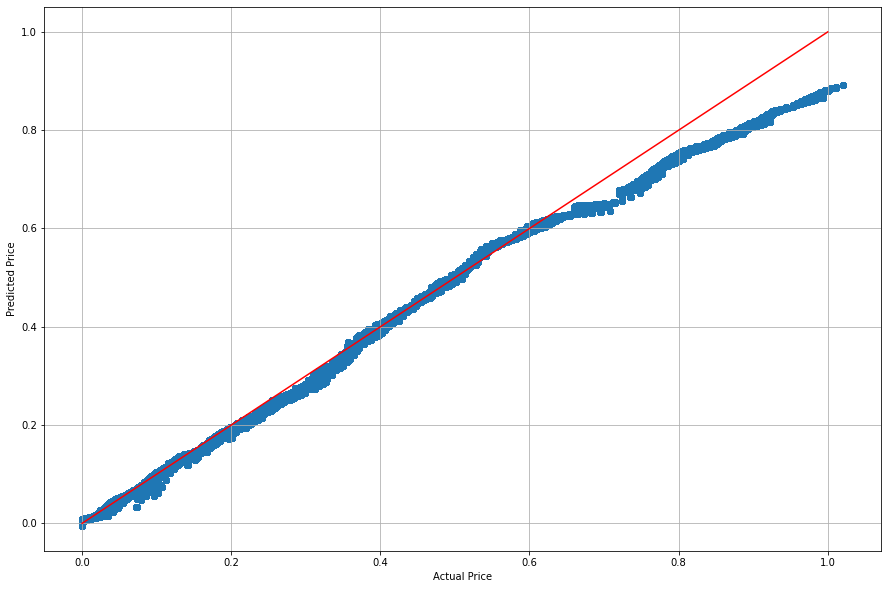

In [20]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([0,1], [0,1], 'r')
plt.grid(True)

we somewhat achieved in training a neural network  that produces results similarly to the Black Scholes model.